In [1]:
from melee_dataset import MeleeDataset
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm
import torch
from torch.distributions import Categorical
from torch.distributions import Bernoulli,Normal
import matplotlib.pyplot as plt
from PolicyNet import PolicyNet
import torch.nn.functional as F
from Agents.BCAgent import BCAgent

%load_ext autoreload
%autoreload 2

In [2]:
# train_dataset = MeleeDataset(data_path="data/train_mini_515")
train_dataset = MeleeDataset(data_path="data/train_mini_40")
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

val_dataset = MeleeDataset(data_path="data/val_mini_10")
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=True)


In [3]:
print(f"obs_dim: {train_dataset[0][0].shape}")
print(f"act_dim: {train_dataset[0][1].shape}")

obs_dim: torch.Size([70])
act_dim: torch.Size([17])


In [4]:
from Agents.BCAgent import BCAgent

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
obs_dim = train_dataset[0][0].shape[0]
act_dim = train_dataset[0][1].shape[0]
# opt     = optim.Adam(policy.parameters(), lr=1e-3)
agent = BCAgent(obs_dim, act_dim, device)

losses = []
val_losses = []
for epoch in range(10):
    total_loss = 0.0
    for i, (states, actions, next_states) in tqdm(enumerate(train_loader)):
        states = states.to(device)       # [B, obs_dim]
        actions = actions.to(device)     # [B] integers in [0…act_dim-1]
        next_states = next_states.to(device)

        loss = agent.train(states, actions, next_states)


        total_loss += loss * states.shape[0]
    avg_loss = total_loss / len(train_dataset)
    losses.append(avg_loss)
    print(f"Epoch {epoch+1} — Loss: {avg_loss:.4f}")

    val_loss = 0.0  
    for i, (states, actions, next_states) in tqdm(enumerate(val_loader)):
        states = states.to(device)       # [B, obs_dim]
        actions = actions.to(device)     # [B] integers in [0…act_dim-1]
        next_states = next_states.to(device)

        val_loss += agent.validate(states, actions)
    avg_val_loss = val_loss / len(val_dataset)
    val_losses.append(avg_val_loss)
    print(f"Epoch {epoch+1} — Val Loss: {avg_val_loss:.4f}")


Using device: cuda


3303it [01:07, 49.22it/s] 


Epoch 1 — Loss: -2.6924


864it [00:15, 55.86it/s] 


Epoch 1 — Val Loss: -12.1319


3303it [00:10, 318.22it/s]


Epoch 2 — Loss: -17.0026


864it [00:00, 887.46it/s]


Epoch 2 — Val Loss: -21.4373


3303it [00:10, 318.16it/s]


Epoch 3 — Loss: -21.3706


864it [00:00, 873.95it/s]


Epoch 3 — Val Loss: -21.4880


3303it [00:10, 323.62it/s]


Epoch 4 — Loss: -21.6860


864it [00:01, 862.82it/s]


Epoch 4 — Val Loss: -21.6158


3303it [00:10, 328.18it/s]


Epoch 5 — Loss: -21.9617


864it [00:01, 841.81it/s]


Epoch 5 — Val Loss: -21.3982


3303it [00:10, 309.09it/s]


Epoch 6 — Loss: -22.2041


864it [00:01, 832.00it/s]


Epoch 6 — Val Loss: -21.4078


3303it [00:10, 307.28it/s]


Epoch 7 — Loss: -22.4264


864it [00:01, 826.64it/s]


Epoch 7 — Val Loss: -21.0797


3303it [00:11, 297.53it/s]


Epoch 8 — Loss: -22.6249


864it [00:01, 847.05it/s]


Epoch 8 — Val Loss: -21.2607


3303it [00:10, 305.31it/s]


Epoch 9 — Loss: -22.8103


864it [00:00, 900.01it/s]


Epoch 9 — Val Loss: -21.0540


3303it [00:11, 295.60it/s]


Epoch 10 — Loss: -23.0013


864it [00:00, 924.54it/s]

Epoch 10 — Val Loss: -20.9967


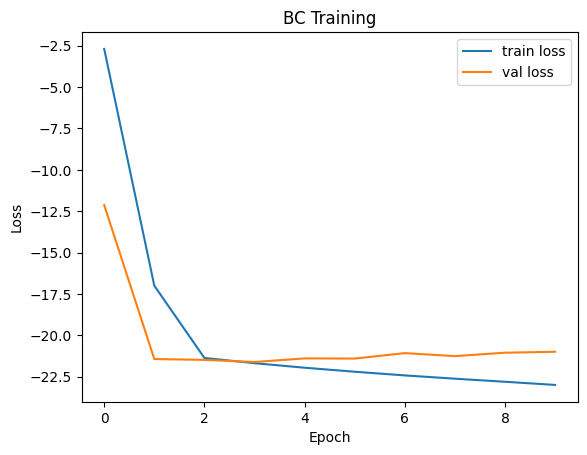

In [7]:
import matplotlib.pyplot as plt

plt.figure()
plt.title("BC Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(losses, label="train loss")
plt.plot(val_losses, label="val loss")
plt.legend()
plt.show()



In [8]:
# Save the trained model
torch.save(agent.policy_net.state_dict(), "bc_40_train_same_logstd.pth")
print("Model saved to trained_policy.pth")


Model saved to trained_policy.pth
